In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from PIL import Image

C:\Users\Antonio-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


Obtenemos las imágenes sobre las temáticas y las guardamos en el directorio

In [16]:
object_types = ["mercedes", "porsche", "bmw", "audi"]
path = Path('cars')
numberOfMaxImages = 150

if not path.exists():
  path.mkdir()
  
for o in object_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(f'{o}')
  
  cont = 0
  index = 0
  while cont < numberOfMaxImages and index < len(results):
    try: 
      download_url(results[index], str(dest) + "/" + str(cont) + ".jpg", timeout=20)
      cont += 1
    except:
      pass
    finally:
      index += 1

IndentationError: expected an indented block (87682858.py, line 29)

In [38]:
#def to_black_white(img):
#    img = Image.open(img, 'r')
#    img = img.convert('L')
#    img.save(img.filename)

#def convert_to_grayscale(path):
#    for item in path.iterdir():
#        if(item.is_file()):
#            convert_to_grayscale(item)
#        else:
#            to_black_white(item)
#
#convert_to_grayscale(path)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Antonio-PC\\Dropbox\\(PIA) Programación de Inteligencia Artificial\\TransferLearning\\cars\\audi'

Limpiamos las imágenes descargadas que estén corruptas

In [3]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

Creamos el DataLoader

In [4]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Entrenamos el modelo con las imágenes

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\Antonio-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


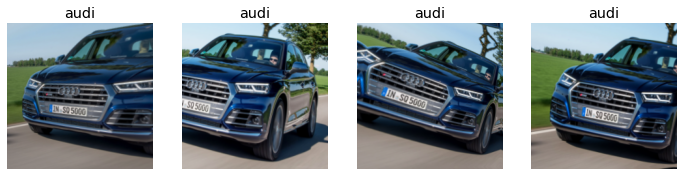

In [5]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.223232,1.641124,0.618644,00:37


epoch,train_loss,valid_loss,error_rate,time
0,1.787789,1.256206,0.483051,00:42
1,1.562624,1.115885,0.457627,00:44
2,1.383091,1.017374,0.381356,00:43
3,1.278633,0.998276,0.381356,00:42


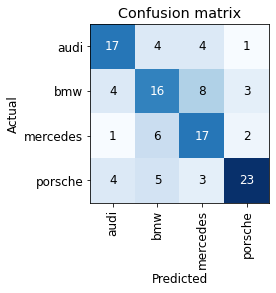

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

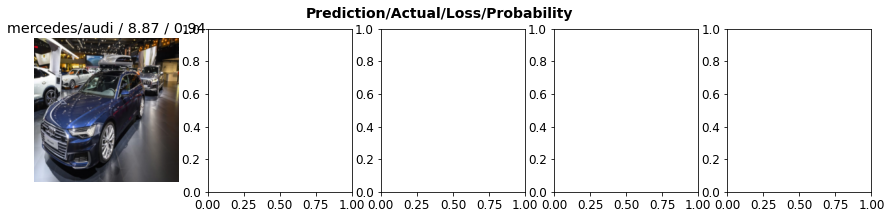

In [8]:
interp.plot_top_losses(5, nrows=1)

In [9]:
cleaner = ImageClassifierCleaner(learn)
cleaner
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Exportamos el modelo a un archivo .pkl

In [10]:
learn.export()

In [11]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
learn_inf.dls.vocab

['audi', 'bmw', 'mercedes', 'porsche']